# Diabetes Prediction

### Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

### Data Collection and Analysis

In [4]:
#Importing the dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [5]:
#Reading the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Shape of the dataset
diabetes_dataset.shape

(768, 9)

In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Statistical analysis of Dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Pre-processing

In [9]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic

1 - Diabetic

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [12]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Data Standardization
Data standardization is an important technique that is mostly performed as a pre-processing step before inputting data into many machine learning models, to standardize the range of features of an input data set.

In [13]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Bivariate and Multivariate Analysis
Bivariate Data Analysis: It is a statistical method examining how two different things are related. The bivariate analysis aims to determine if there is a statistical link between the two variables and, if so, how strong and in which direction that link is.

Multivariate Data Analysis: Multivariate analysis allows you to find patterns between variables, helping you better understand the effects that different factors have on each other and the relationships between them.


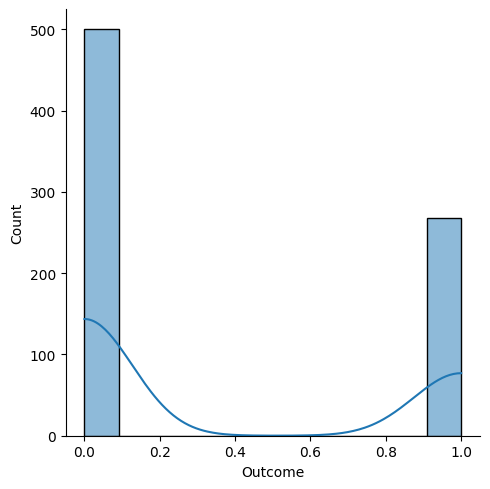

In [16]:
sns.displot(diabetes_dataset['Outcome'],kde=True)

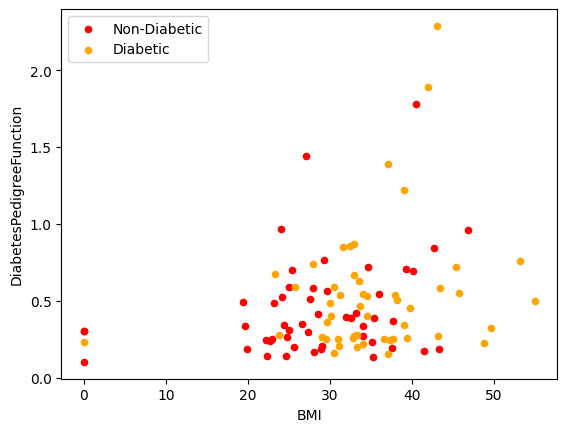

In [17]:
#Bivariate Analysis using a scatterplot
ax = diabetes_dataset[diabetes_dataset['Outcome'] == 0][0:50].plot(kind='scatter', x='BMI', y='DiabetesPedigreeFunction', color='Red', label='Non-Diabetic');
diabetes_dataset[diabetes_dataset['Outcome'] == 1][0:50].plot(kind='scatter', x='BMI', y='DiabetesPedigreeFunction', color='Orange', label='Diabetic', ax=ax);
plt.show()

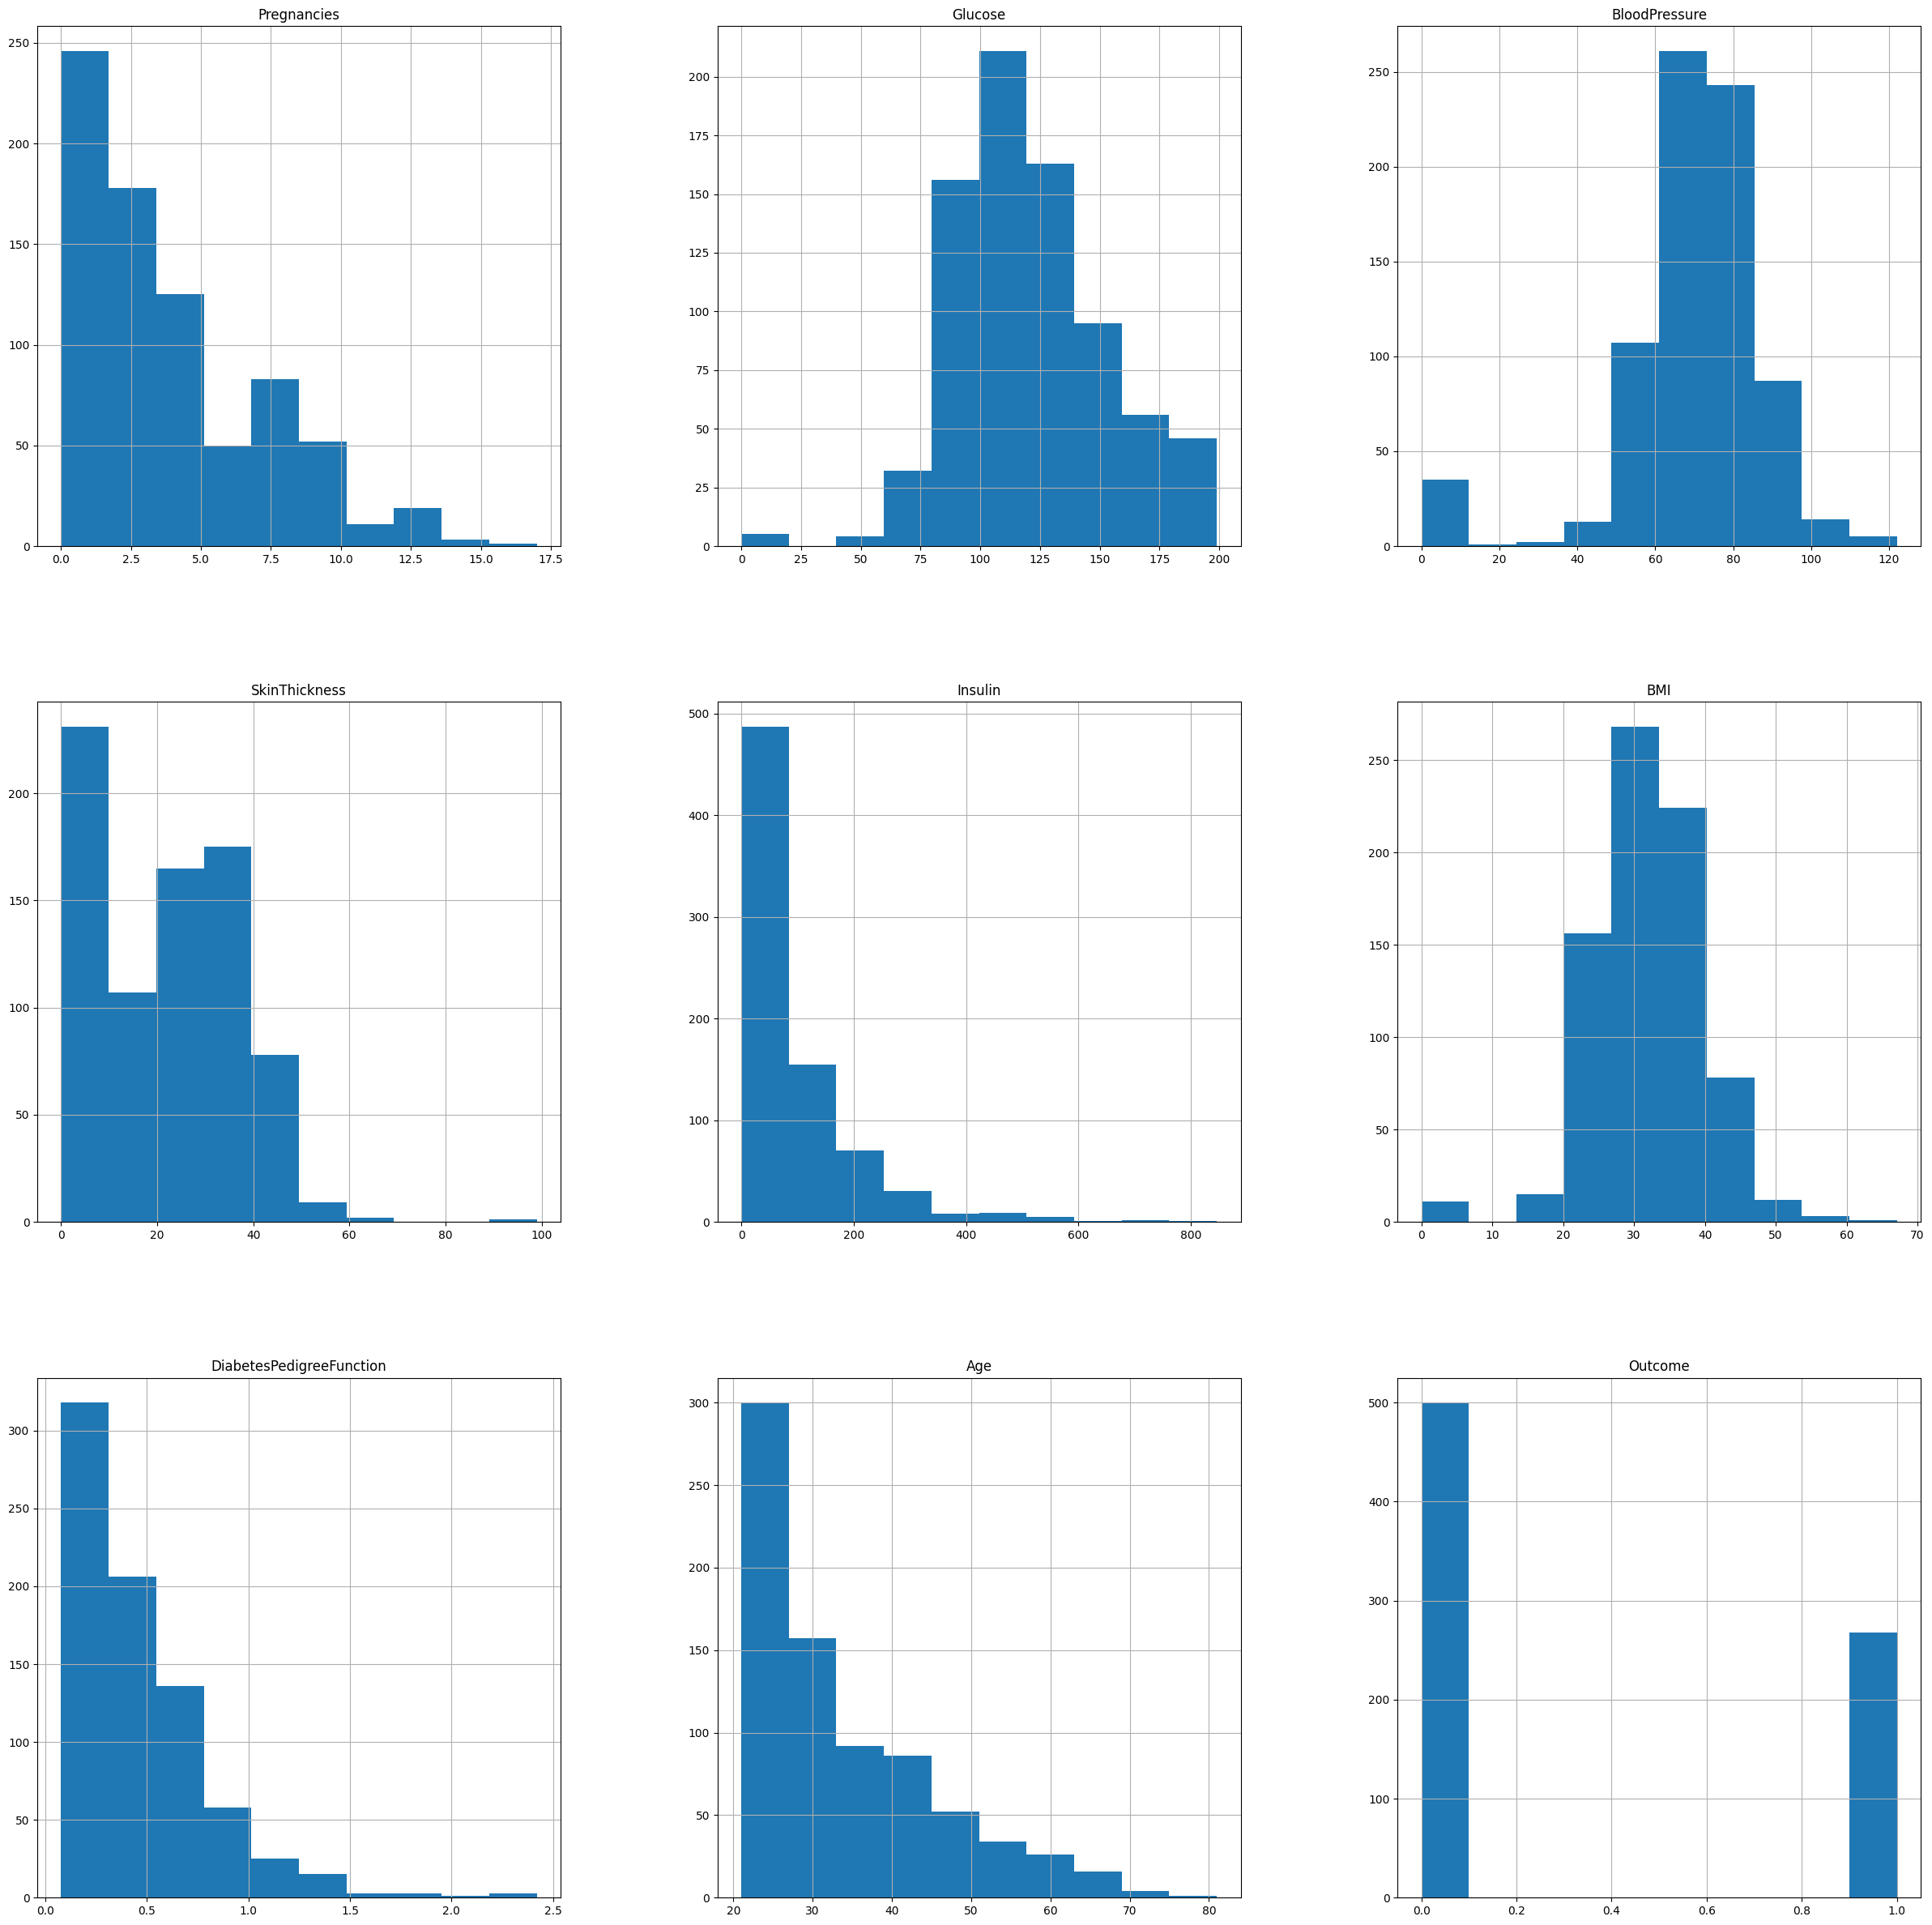

In [18]:
#Multivariate Analysis using Histogram
diabetes_dataset.hist(figsize=(30,30))
plt.show()

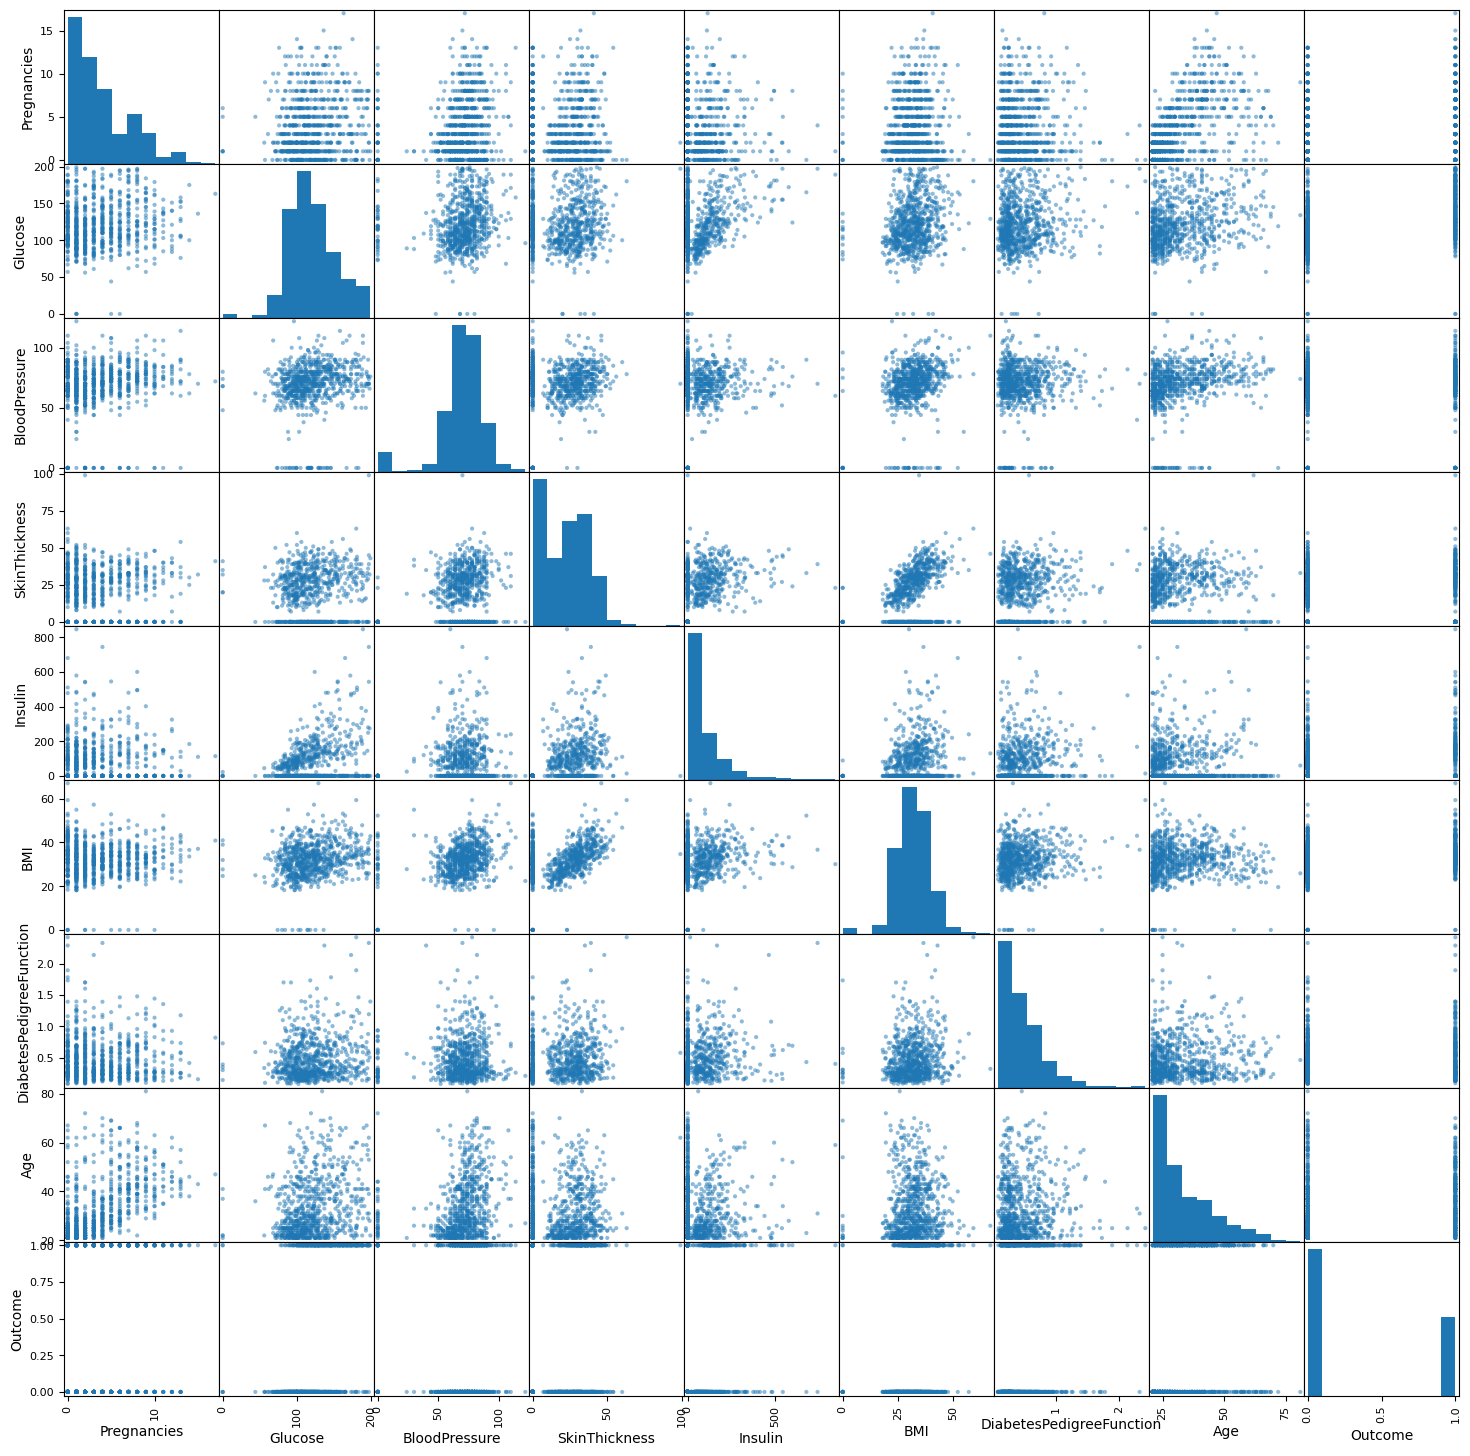

In [19]:
#Multivariate analysis using Scatterplot matrix
scatter_matrix(diabetes_dataset, figsize = (18,18))
plt.show()

<Axes: >

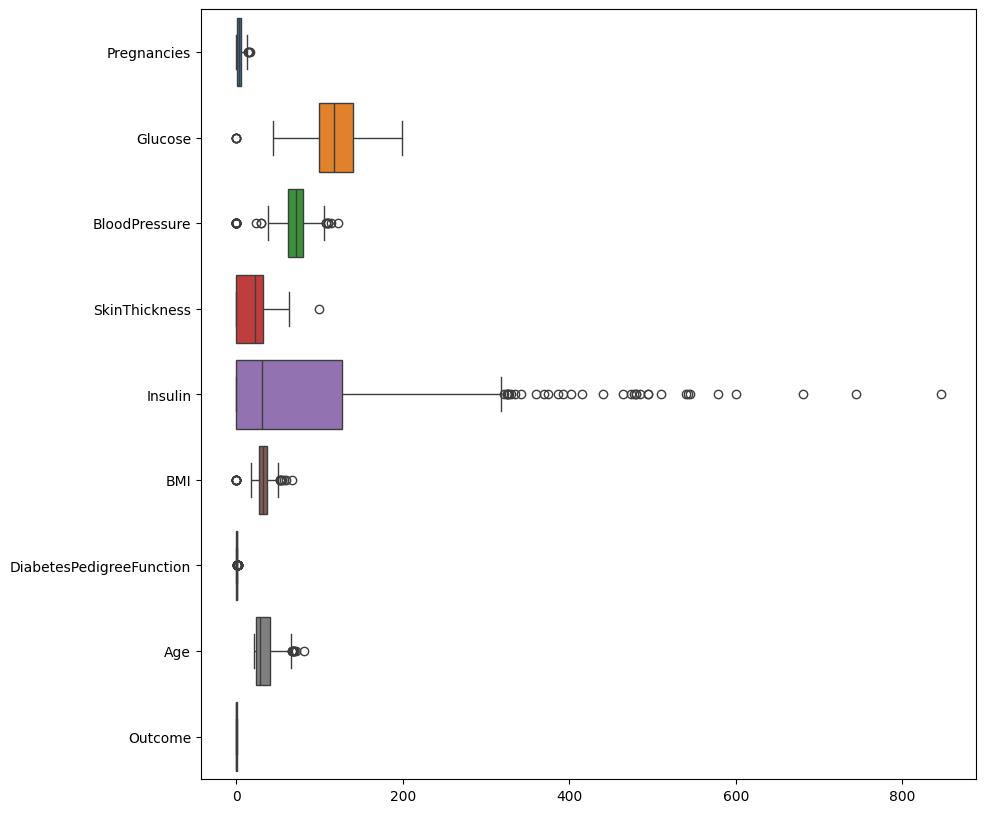

In [20]:
#Multivariate analysis using boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=diabetes_dataset,orient='h')

### Feature Selection
It is the method of reducing the input variable to yourmodel by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.


In [21]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


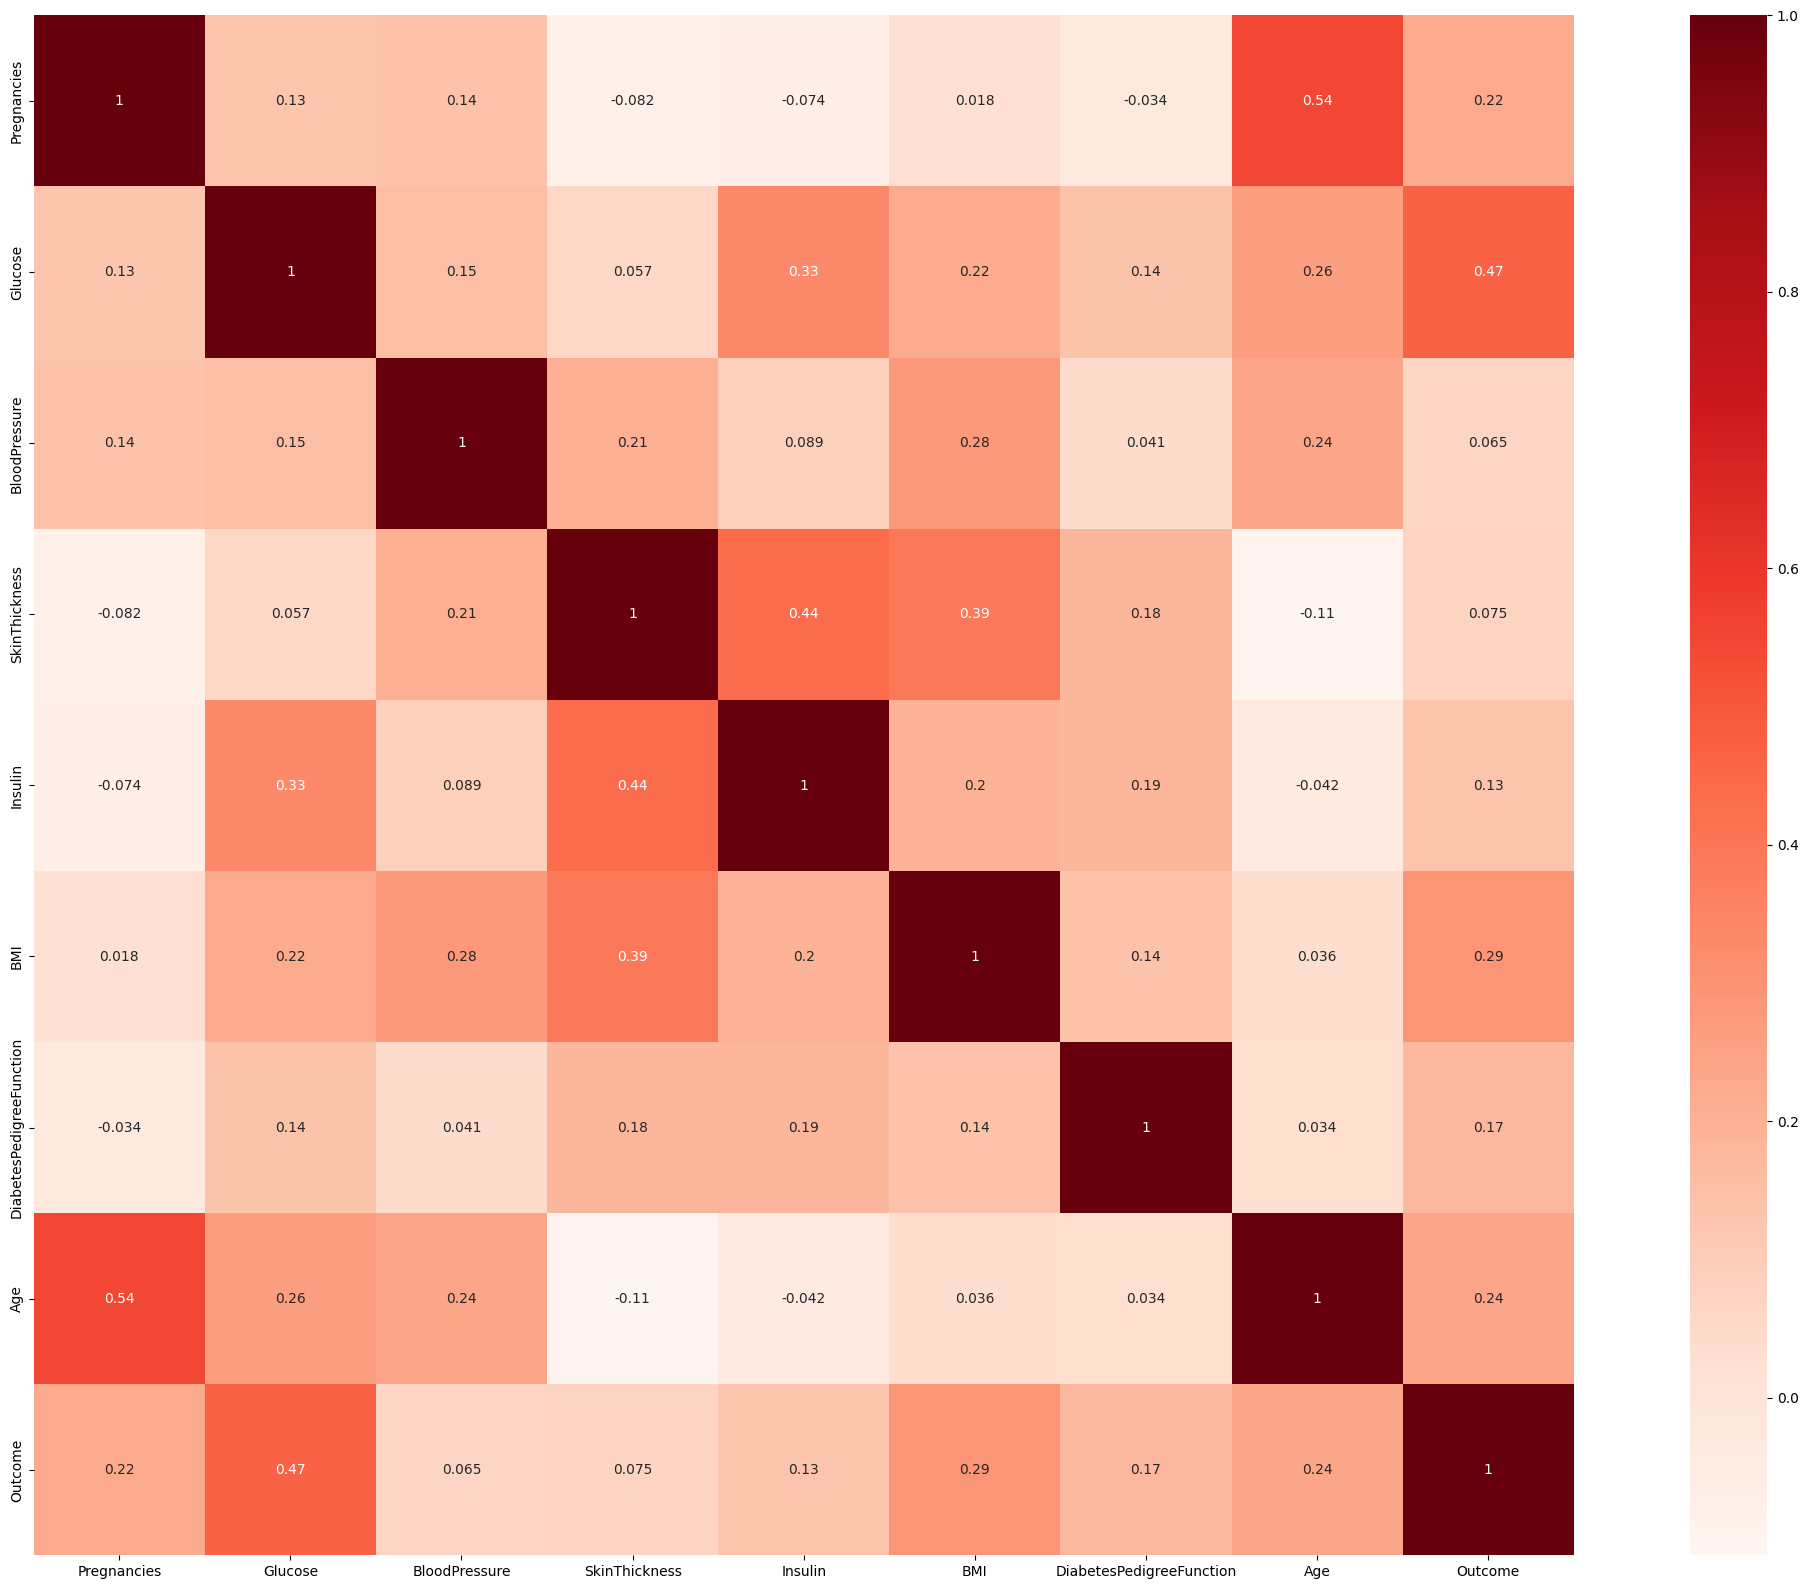

In [22]:
#Showing correlations between features using a Heatmap
plt.figure(figsize=(30,20))
cor = diabetes_dataset.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Reds)
plt.show()

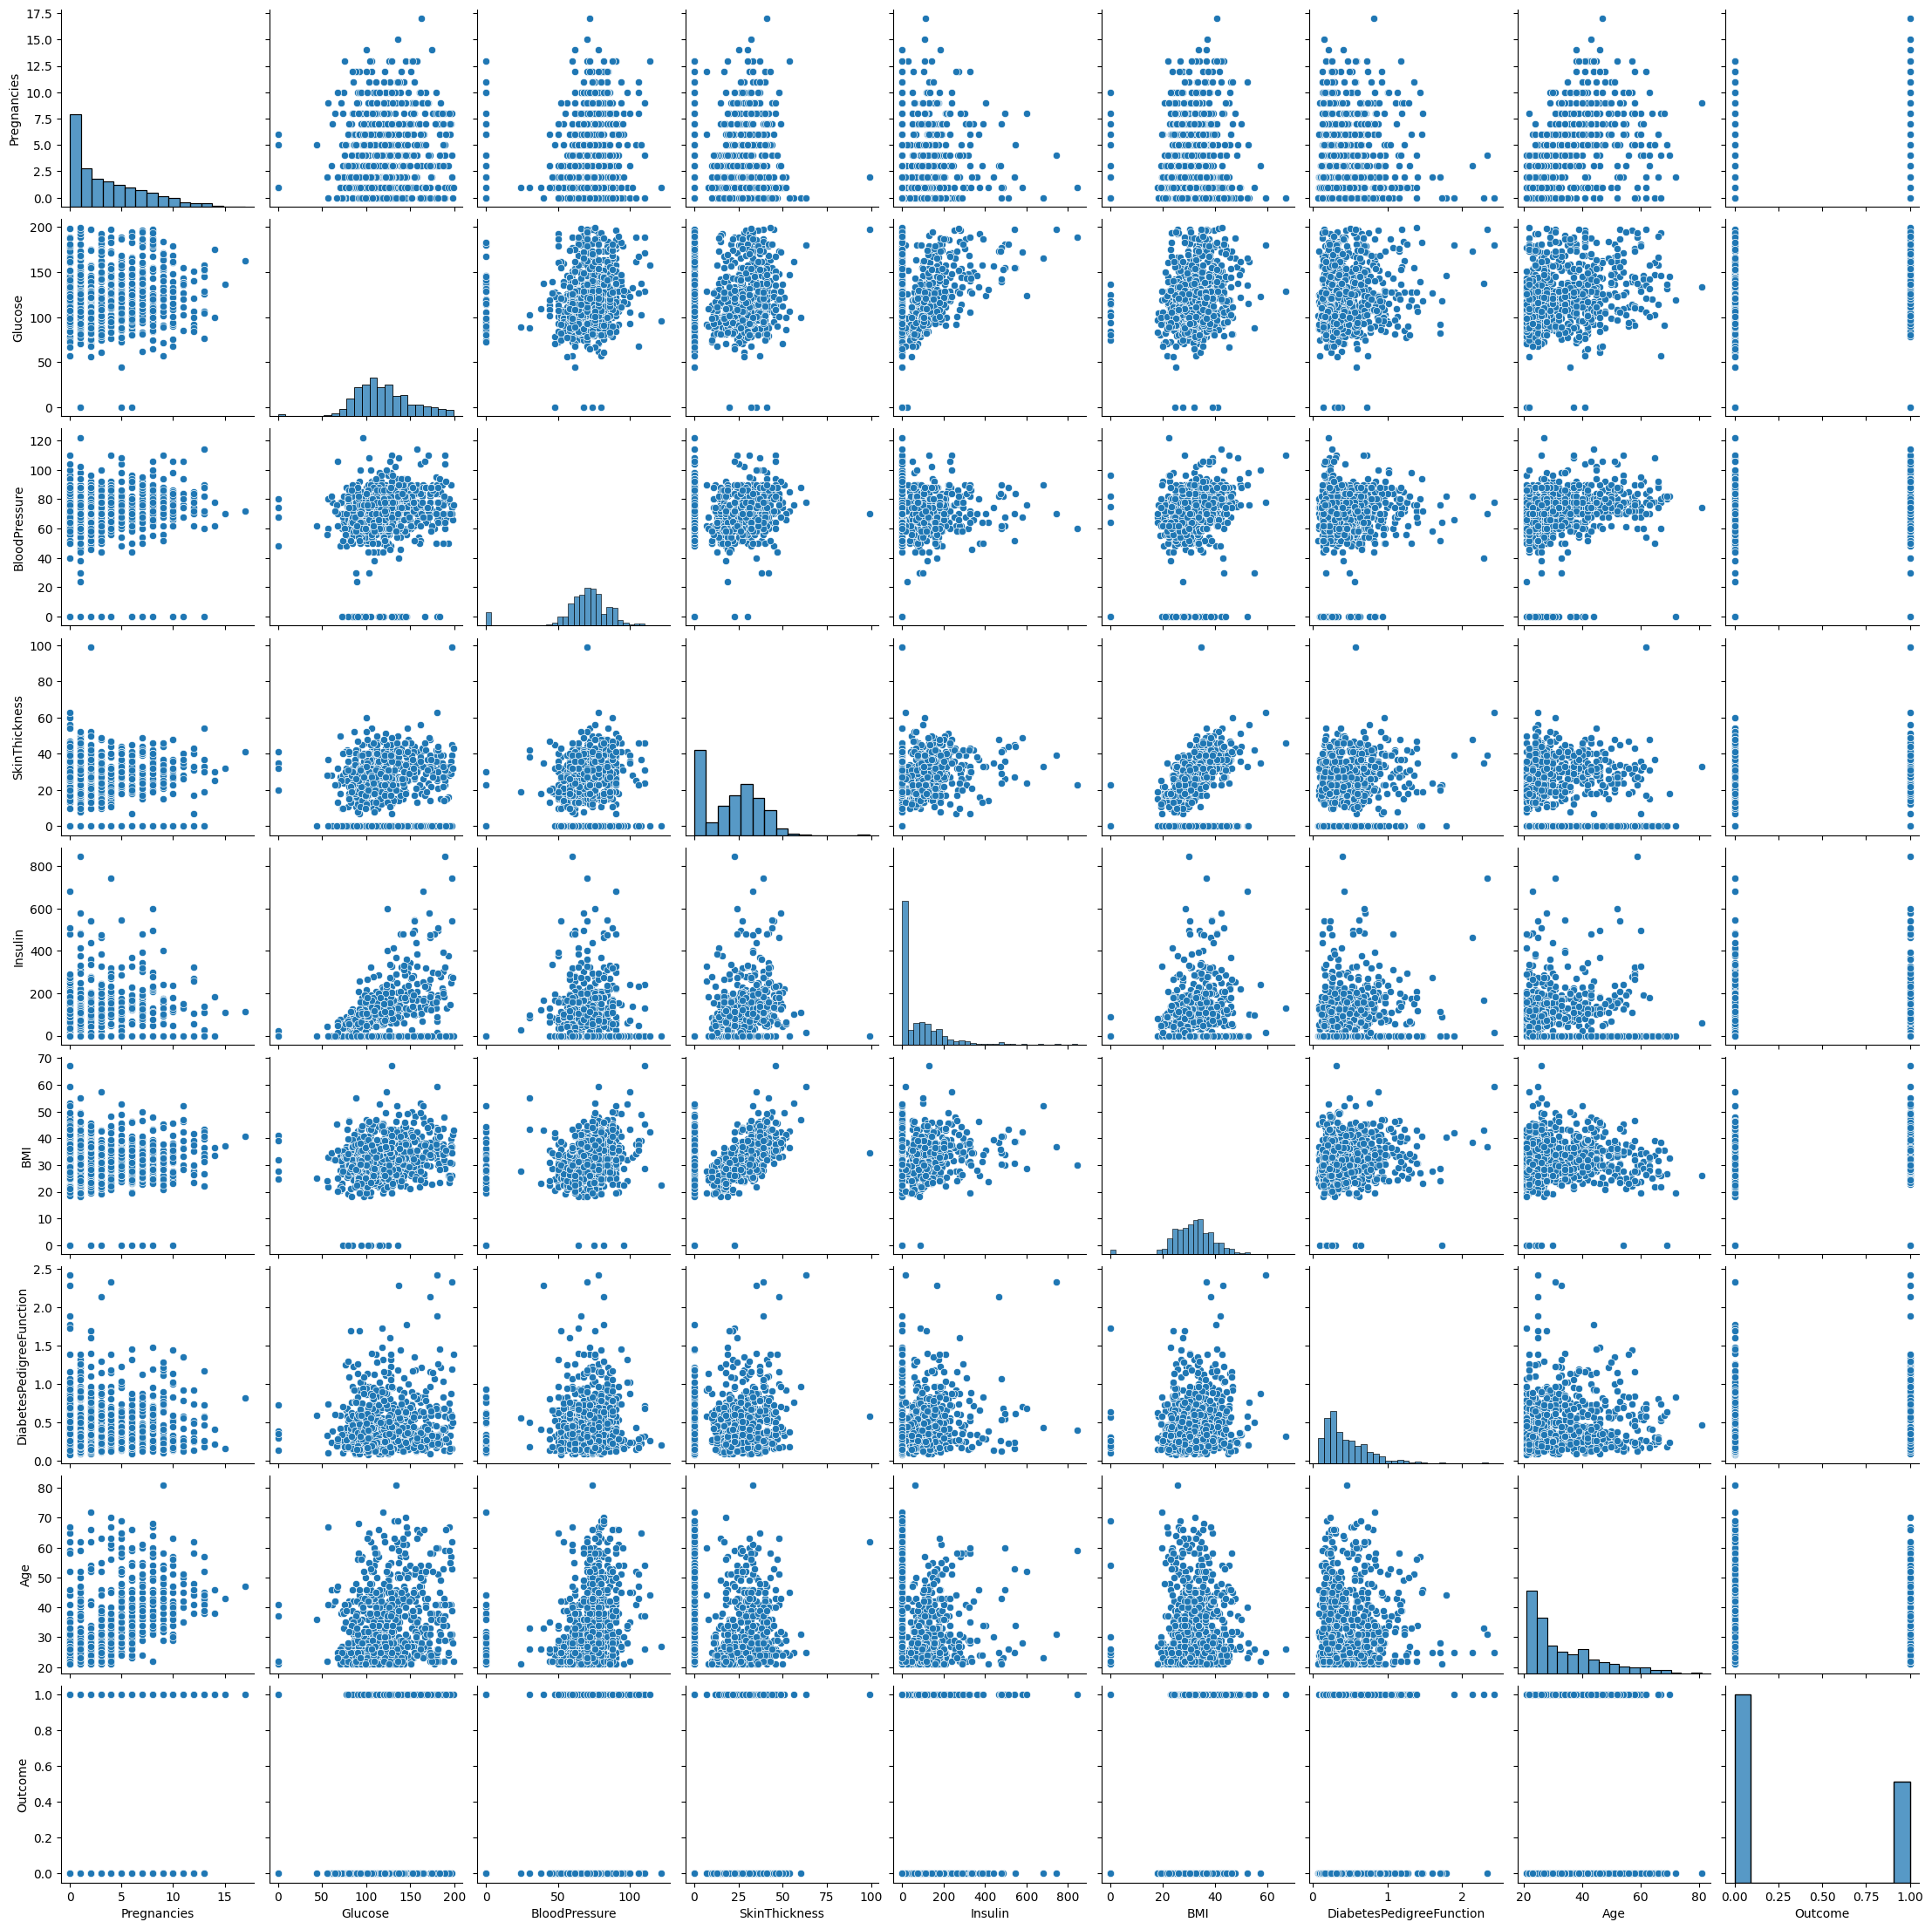

In [23]:
#Feature selection using Pairplot
sns.pairplot(diabetes_dataset)

In [24]:
#Correlation with output variable
cor_target = abs(cor["Outcome"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### Train and Test Split

In [25]:
#Splitting the data into predicting variables and target variables
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=21)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


### Model Selection
Support Vector Machine (SVM): It is a supervised machine learning algorithm used for classification and regression tasks. SVM is particularly effective in high-dimensional spaces and is widely used in tasks such as image classification, handwriting recognition, and text classification. It is a discriminative algorithm that finds the hyperplane that best distinguishes different classes in the feature space.

K-Nearest Neighbors (KNN): It is a simple and intuitive machine learning algorithm used for classification and regression tasks. In ANN, the prediction of a new data point is based on the majority class in the feature space (for classification) or the average of the nearest neighbor target values (for regression).

Gaussian Naïve Bayes (NB): It is a probabilistic classification algorithm based on Bayes' theorem. It is an extension of the Naive Bayes algorithm and assumes that the features follow a Gaussian distribution. GNB is commonly used for classification tasks, especially when continuous or real-valued features are involved.

Decision Tree Classifier (CART): It is a machine learning algorithm used forclassification tasks. It builds a tree structure based on the features of the dataset, where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the predicted class.


In [26]:
scoring = 'accuracy'
models= []
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

#Checking the accuracy of each model
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s - Mean accuracy is %f and Std accuracy is %f." % (name, cv_results.mean(), cv_results.std())
    print(msg)

For SVM - Mean accuracy is 0.768868 and Std accuracy is 0.047023.
For KNN - Mean accuracy is 0.726240 and Std accuracy is 0.043125.
For Gaussian Naive Bayes - Mean accuracy is 0.761530 and Std accuracy is 0.047692.
For Decision Tree Classifier - Mean accuracy is 0.722781 and Std accuracy is 0.062544.


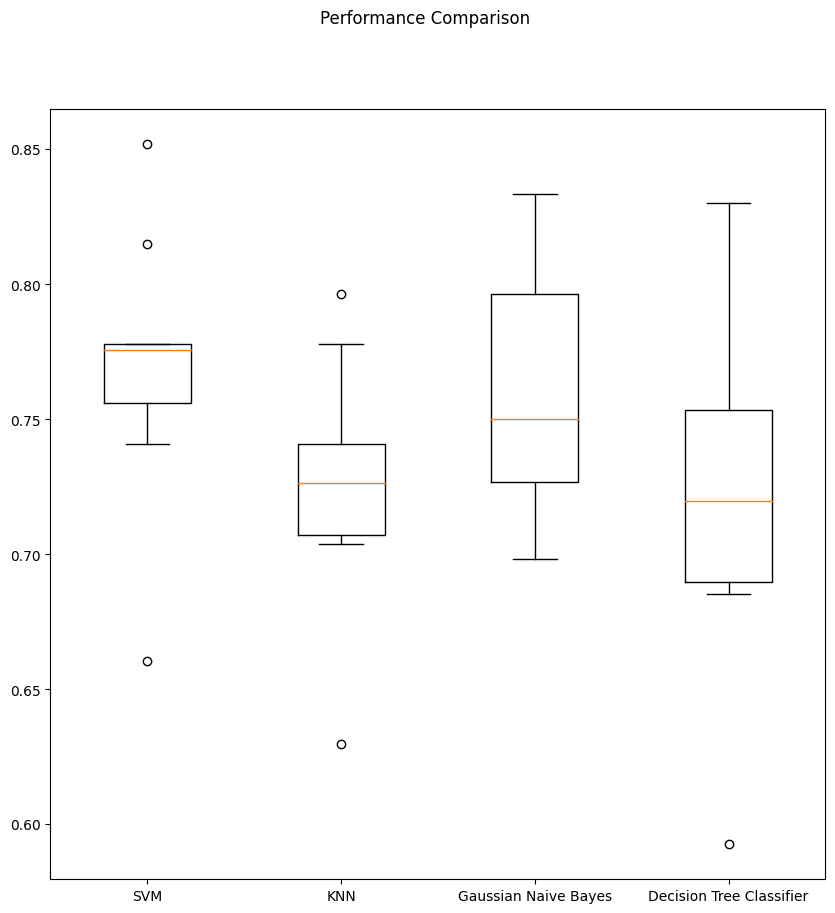

In [27]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SVM had the highest mean accuracy while Decision Tree had the highest standard accuracy.

### Model Evaluation

Parameters used for Model Evaluation:

Precision: It is a performance metric that quantifies the accuracy of positive predictions made by a classification model. It is particularly relevant in binary classification problems, where the goal is to distinguish between two classes, typically referred to as the positive class and the negative class.

Recall: It is a performance metric that quantifies the ability of a classification model to capture or retrieve all the relevant instances of a particular class, also known as the sensitivity or true positive rate. Recall is particularly important in scenarios where the cost of missing positive instances (false negatives) is high.

F1-score: The F1 score, which is the harmonic mean of precision and recall, is another metric that provides a balanced evaluation of a model's performance, especially when there is an imbalance between the positive and negative classes.

In [28]:
#Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel - ",name)
    print("Accuracy score - ",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))


Model -  SVM
Accuracy score -  0.7272727272727273
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       144
           1       0.75      0.41      0.53        87

    accuracy                           0.73       231
   macro avg       0.74      0.67      0.67       231
weighted avg       0.73      0.73      0.70       231


Model -  KNN
Accuracy score -  0.7489177489177489
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       144
           1       0.75      0.49      0.60        87

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.73       231


Model -  Gaussian Naive Bayes
Accuracy score -  0.7316017316017316
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80      

### Training the Model

In [29]:
#Training the selected SVM model on Training and Test data
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [30]:
#Accuracy score on the Training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8100558659217877


In [31]:
#Accuracy score on the Test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7359307359307359


In [32]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.7272727272727273


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Making a Predictive System

In [33]:
input_data = (1,89,66,23,94,28.1,0.167,21)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print('Test report:', std_data)

prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('Outcome is 0, hence the person is not Diabetic.')
else:
  print('Outcome is 1, hence the person is Diabetic.')

Test report: [[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
[0]
Outcome is 0, hence the person is not Diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.92      0.81       144
           1       0.75      0.41      0.53        87

    accuracy                           0.73       231
   macro avg       0.74      0.67      0.67       231
weighted avg       0.73      0.73      0.70       231



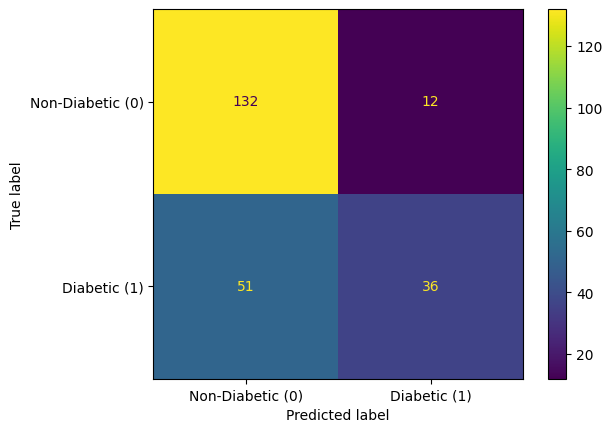

In [34]:
#Checking the accuracy of predicted results using a confusion Matrix
confusion_matrix = metrics.confusion_matrix(Y_test, predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Diabetic (0)', 'Diabetic (1)'])
cm_display.plot()
print (classification_report(Y_test, predict))
plt.show()

### Final Prediction


In [35]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [36]:
#Loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

input_data = (1,89,66,23,94,28.1,0.167,21)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('Outcome is 0, hence the person is Not diabetic.')
else:
  print('Outcome is 1, hence the person is Diabetic.')

[0]
Outcome is 0, hence the person is Not diabetic.
